In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv("car_sales_data.csv")

df = pd.DataFrame(dataset)

In [3]:
df.shape

(2500000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dates              object 
 1   Salesperson        object 
 2   Customer_Name      object 
 3   Car_Make           object 
 4   Car_Model          object 
 5   Car_Year           int64  
 6   Sale_Price         int64  
 7   Commission_Rate    float64
 8   Commission_Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [5]:
# converting Date column to date format

df["Dates"] = pd.to_datetime(df["Dates"])

# Rechecking
df["Dates"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2500000 entries, 0 to 2499999
Series name: Dates
Non-Null Count    Dtype         
--------------    -----         
2500000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 19.1 MB


In [6]:
df.isnull().sum()

Dates                0
Salesperson          0
Customer_Name        0
Car_Make             0
Car_Model            0
Car_Year             0
Sale_Price           0
Commission_Rate      0
Commission_Earned    0
dtype: int64

In [7]:
df.head()

,Dates,Salesperson,Customer_Name,Car_Make,Car_Model,Car_Year,Sale_Price,Commission_Rate,Commission_Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [8]:
# Creating some new columns for better analysis

# Creating Month column
df["Month"] = df["Dates"].dt.month

# Creating Year column
df["Year"] = df["Dates"].dt.year

# Creating Quarter column
df["Quarter"] = df["Dates"].dt.to_period("Q")

# Creating Car age column
df["Car_Age"] = df["Year"] - df["Car_Year"]

# Creating Profit column
df["Profit"] = df["Sale_Price"] - df["Commission_Earned"]

# Creating Profit_Margin column
df["Profit_Margin"] = df["Profit"] / df["Sale_Price"] * 100


In [9]:
df.describe()

,Dates,Car_Year,Sale_Price,Commission_Rate,Commission_Earned,Month,Year,Car_Age,Profit,Profit_Margin
count,2500000,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2022-10-30 10:01:32.632321024,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03,6.523978e+00,2.022330e+03,6.333977e+00,2.701117e+04,9.000123e+01
min,2022-05-01 00:00:00,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02,1.000000e+00,2.022000e+03,0.000000e+00,8.506090e+03,8.500000e+01
25%,2022-07-31 00:00:00,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03,4.000000e+00,2.022000e+03,3.000000e+00,1.800198e+04,8.749934e+01
50%,2022-10-30 00:00:00,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03,7.000000e+00,2.022000e+03,6.000000e+00,2.697682e+04,8.999942e+01
75%,2023-01-30 00:00:00,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03,1.000000e+01,2.023000e+03,1.000000e+01,3.598159e+04,9.250355e+01
max,2023-05-01 00:00:00,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03,1.200000e+01,2.023000e+03,1.300000e+01,4.749184e+04,9.500000e+01
std,NaN,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03,3.444897e+00,4.702848e-01,3.768461e+00,1.043199e+04,2.887202e+00


In [10]:
df.columns

Index(['Dates', 'Salesperson', 'Customer_Name', 'Car_Make', 'Car_Model',
       'Car_Year', 'Sale_Price', 'Commission_Rate', 'Commission_Earned',
       'Month', 'Year', 'Quarter', 'Car_Age', 'Profit', 'Profit_Margin'],
      dtype='object')

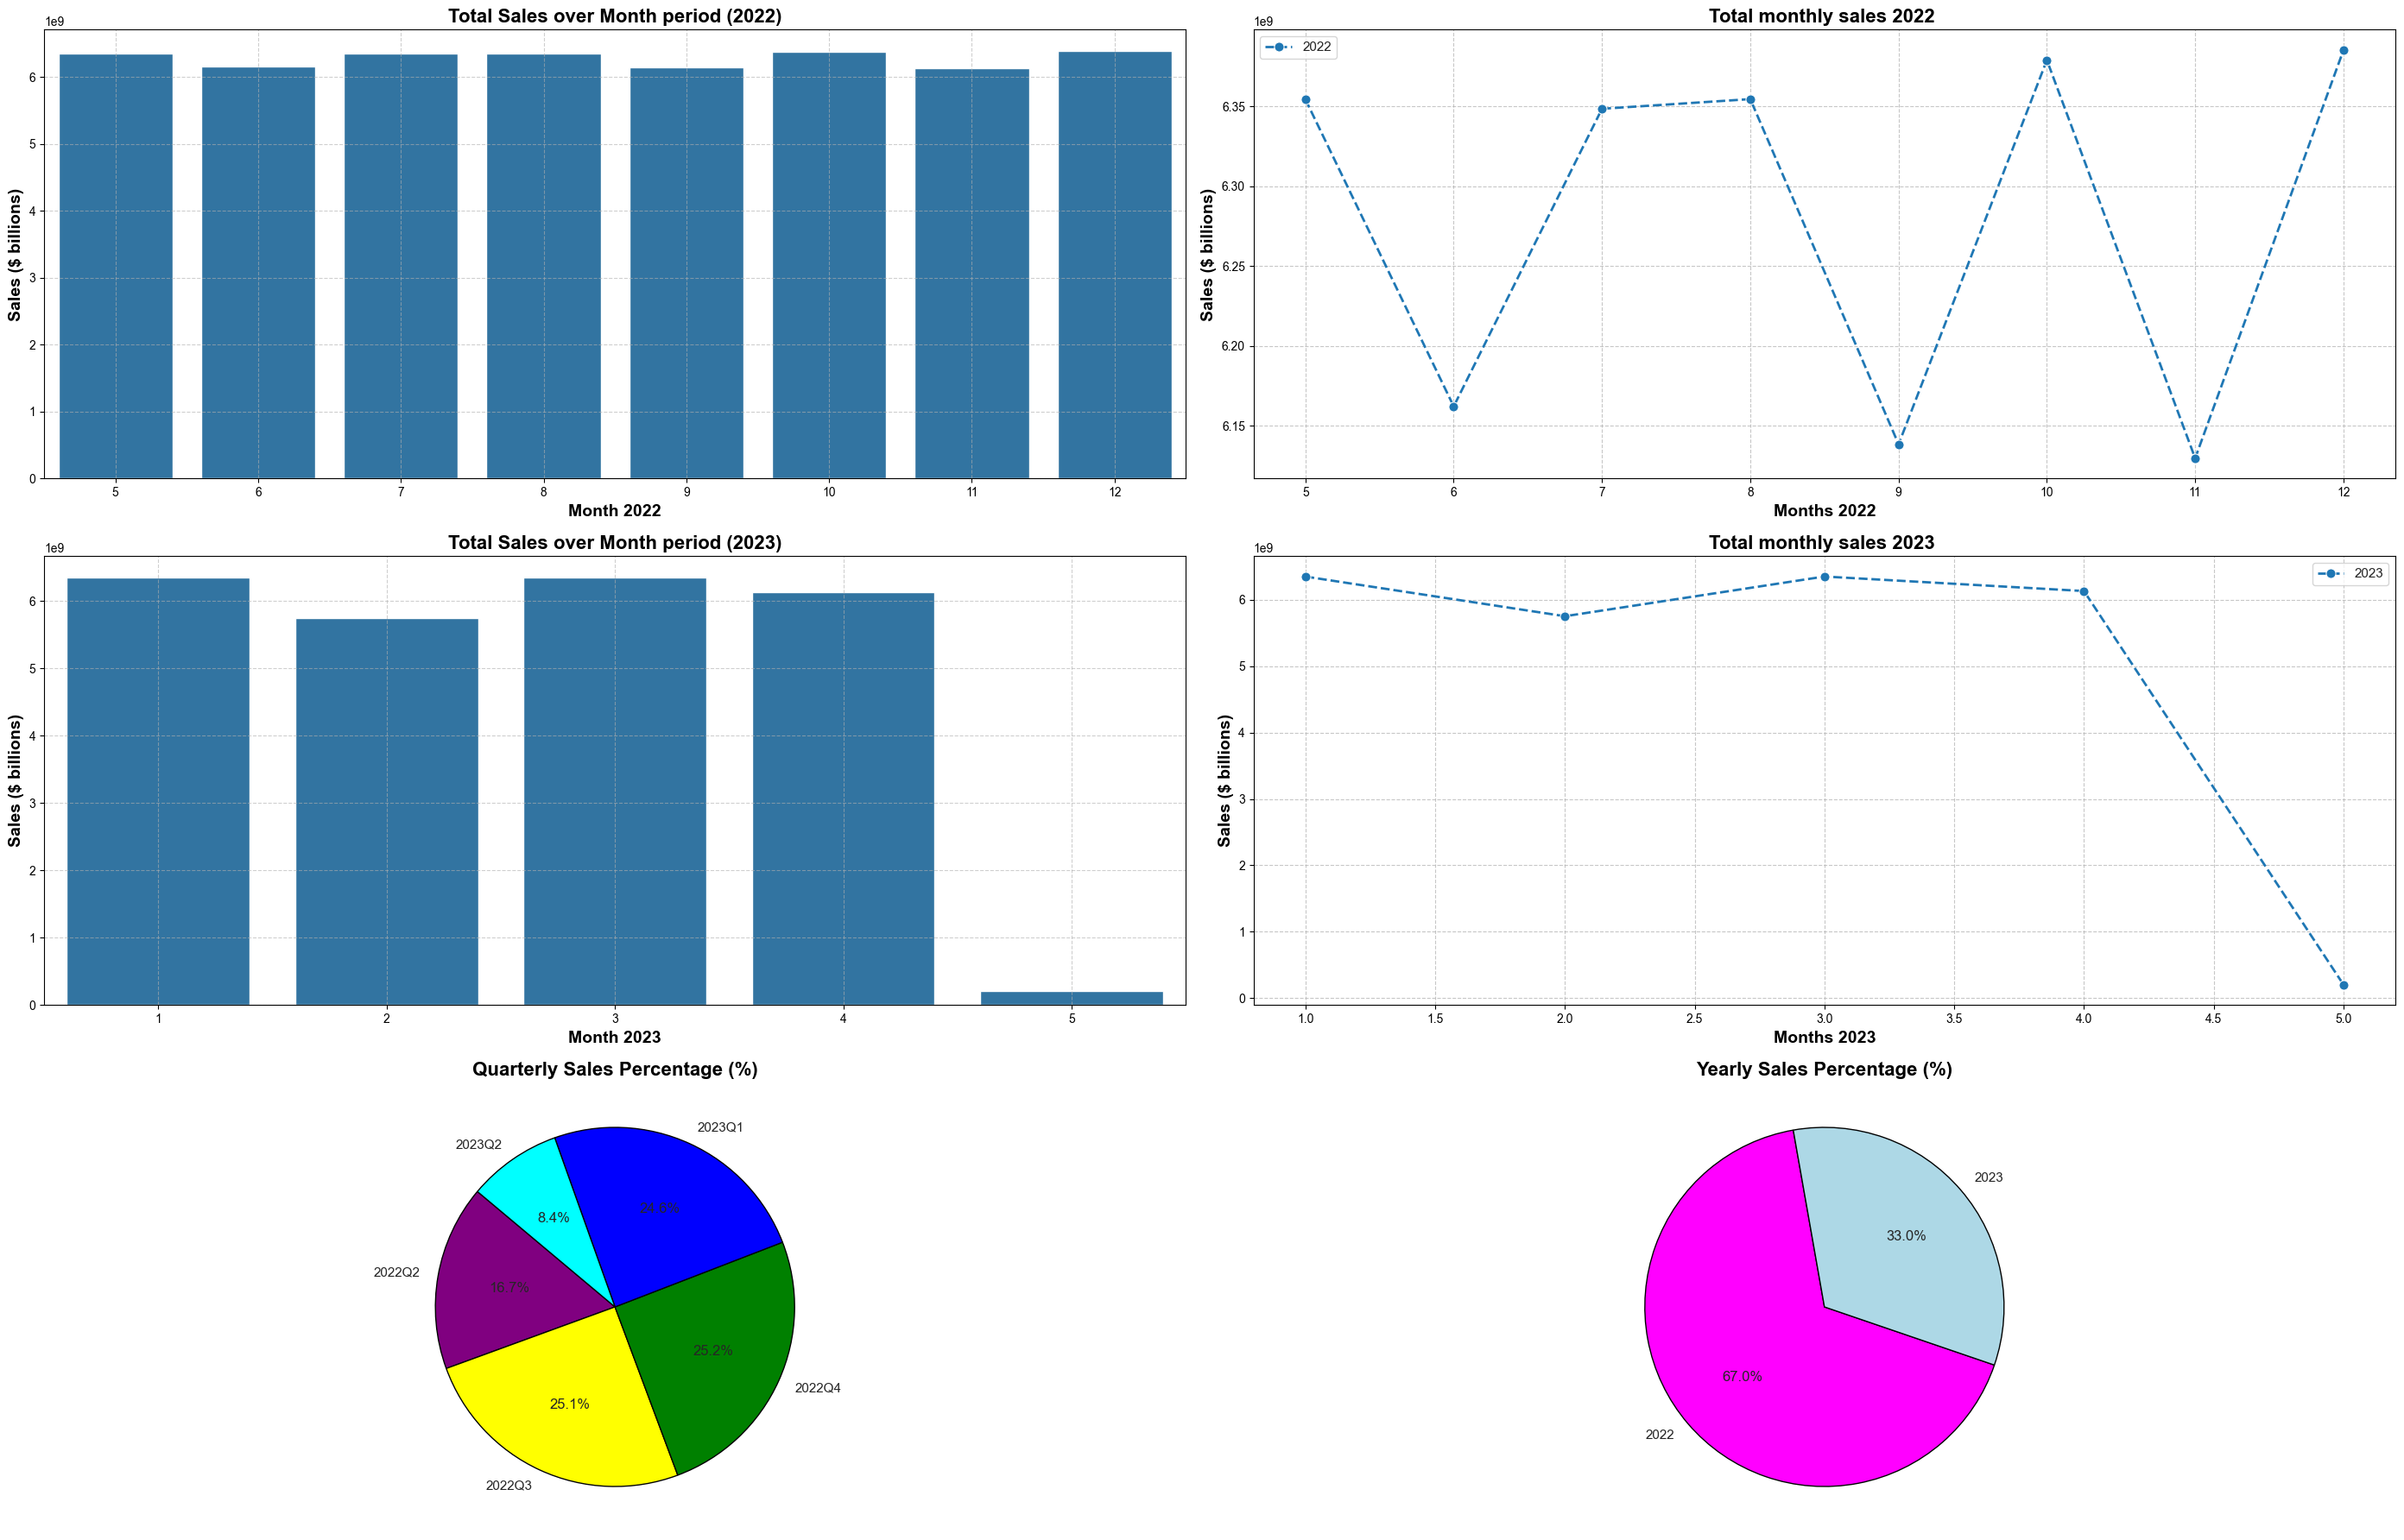

In [11]:
# 1. **Sales Trends and Seasonality**:
#    - How have sales trends evolved over different time periods (e.g., monthly, quarterly, yearly)? Are there any noticeable seasonal patterns or trends?

# Aggregating monthly sales 2022
monthly_sales_2022 = df[df["Year"] == 2022].groupby("Month")["Sale_Price"].sum()


# Aggregating monthly sales 2023
monthly_sales_2023 = df[df["Year"] == 2023].groupby("Month")["Sale_Price"].sum()

# Aggregating yearly sales
yearly_sales = df.groupby("Year")["Sale_Price"].sum()

# Aggregating quarterly sales
quarterly_sales = df.groupby("Quarter")["Sale_Price"].sum()

# Visualizing

fig, ((fig1, fig2), (fig3, fig4), (fig5, fig6)) = plt.subplots(3,2, figsize= (28,18))
sns.set(style="whitegrid", palette="pastel")

# Plotting monthly sales bar graph 2022
sns.barplot(x = monthly_sales_2022.index, y = monthly_sales_2022.values, ax= fig1)
fig1.set_xlabel("Month 2022", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_ylabel("Sales ($ billions)", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_title("Total Sales over Month period (2022)", fontsize= 16, fontweight= "bold", color= "black")
fig1.grid(True, ls= "--", alpha= 0.6)

# Plotting monthly sales line plot 2022
sns.lineplot(x = monthly_sales_2022.index, y = monthly_sales_2022.values, ls= "--", linewidth= 2, marker= "o", markersize= 8, label = "2022", ax= fig2)
fig2.set_xlabel("Months 2022", fontsize=14, fontweight= "bold", color= "black")
fig2.set_ylabel("Sales ($ billions)", fontsize=14, fontweight= "bold", color= "black")
fig2.set_title("Total monthly sales 2022 ", fontsize=16, fontweight= "bold", color= "black")
fig2.grid(True, linestyle="--", alpha=0.7)


# Plotting monthly sales bar graph 2023
sns.barplot(x = monthly_sales_2023.index, y = monthly_sales_2023.values, ax= fig3)
fig3.set_xlabel("Month 2023", fontsize= 14, fontweight= "bold", color= "black")
fig3.set_ylabel("Sales ($ billions)", fontsize= 14, fontweight= "bold", color= "black")
fig3.set_title("Total Sales over Month period (2023)", fontsize= 16, fontweight= "bold", color= "black")
fig3.grid(True, ls= "--", alpha= 0.6)

# Plotting monthly sales line plot 2023
sns.lineplot(x = monthly_sales_2023.index, y = monthly_sales_2023.values, ls= "--", linewidth= 2, marker= "o", markersize= 8, label = "2023", ax= fig4)
fig4.set_xlabel("Months 2023", fontsize=14, fontweight= "bold", color= "black")
fig4.set_ylabel("Sales ($ billions)", fontsize=14, fontweight= "bold", color= "black")
fig4.set_title("Total monthly sales 2023 ", fontsize=16, fontweight= "bold", color= "black")
fig4.grid(True, linestyle="--", alpha=0.7)


# Plotting quarterly sales
fig5.pie(quarterly_sales, autopct="%1.1f%%", startangle= 140, wedgeprops={"edgecolor": "black"}, 
         labels= quarterly_sales.index, colors= ["purple", "yellow", "green", "blue", "cyan"])
fig5.set_title("Quarterly Sales Percentage (%)", fontsize= 16, fontweight= "bold", color= "black")


# Plotting yearly sales
fig6.pie(yearly_sales, autopct="%1.1f%%", startangle= 100, wedgeprops={"edgecolor": "black"}, 
         labels= yearly_sales.index, colors= ["magenta", "lightblue"])
fig6.set_title("Yearly Sales Percentage (%)", fontsize= 16, fontweight= "bold", color= "black")



plt.tight_layout()
plt.show()

The highest revenue generating Car Make is Honda with a total sale of 15036898624






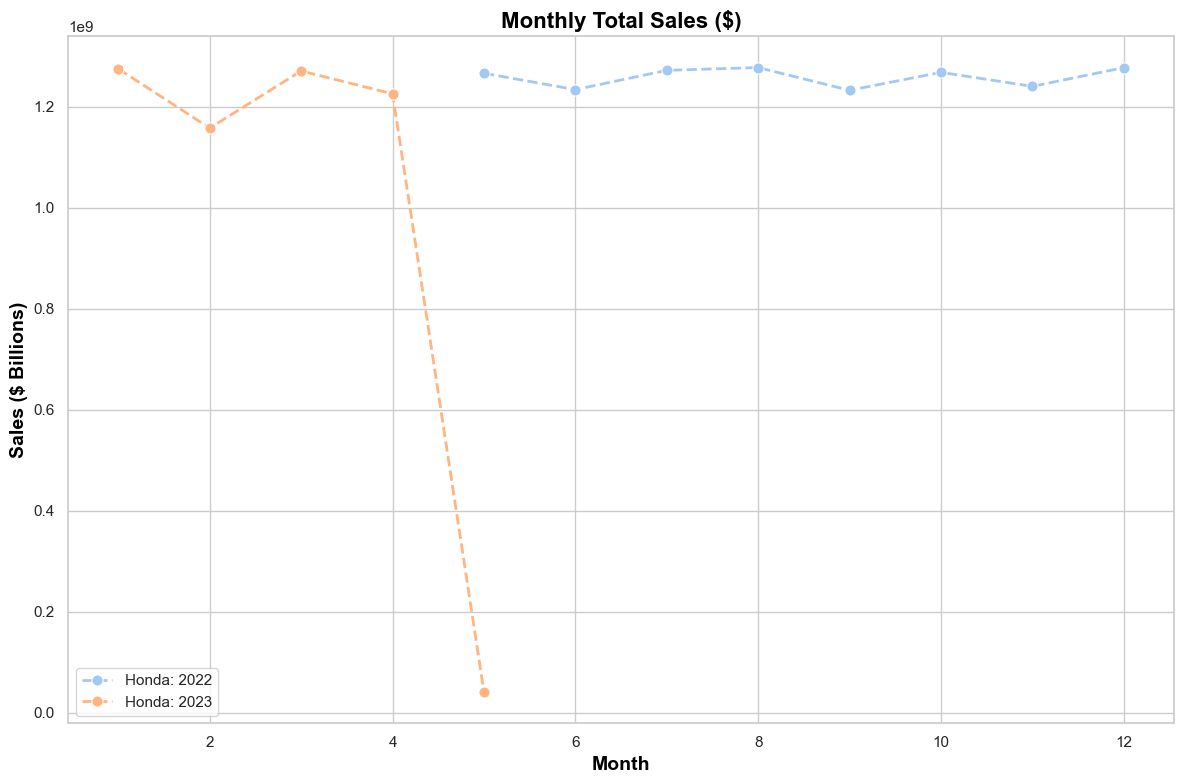

In [12]:
# 2. **Sales Performance by Car Make**:
#    - Which car makes generate the highest revenue and profit margins? How do these performance metrics vary over different periods?

# Aggregating sales by Car make
bycarMakeSales = df.groupby("Car_Make")["Sale_Price"].sum()

bycarMakeSales_sorted = bycarMakeSales.sort_values(ascending=False)

# Highest revenue generating Car Make
ind = bycarMakeSales_sorted.head(1)
print(f"The highest revenue generating Car Make is {ind.index[0]} with a total sale of {ind.values[0]}")

# Aggregating Sales metrics for highest revenue generating car make over different periods
# For year 2022
hirege_month_2022 = df[(df["Car_Make"] == ind.index[0]) & (df["Year"] == 2022)].groupby("Month")["Sale_Price"].sum()
# For year 2023
hirege_month_2023 = df[(df["Car_Make"] == ind.index[0]) & (df["Year"] == 2023)].groupby("Month")["Sale_Price"].sum()
print("\n\n\n")

# Visualizing
plt.figure(figsize=(12,8))

sns.lineplot(x= hirege_month_2022.index, y= hirege_month_2022.values, ls= "--", linewidth= 2, marker= "o", markersize= 8, label= "Honda: 2022")
sns.lineplot(x= hirege_month_2023.index, y= hirege_month_2023.values, ls= "--", linewidth= 2, marker= "o", markersize= 8, label= "Honda: 2023")
plt.xlabel("Month", fontsize = 14, fontweight= "bold", color= "black")
plt.ylabel("Sales ($ Billions)", fontsize = 14, fontweight= "bold", color= "black")
plt.title("Monthly Total Sales ($)", fontsize = 16, fontweight= "bold", color= "black")

plt.tight_layout()
plt.show()

In [13]:
# 3. **Salesperson Effectiveness**:
#    - How does each salesperson's performance compare in terms of total sales, average sale price, and commission earned? What factors contribute to their performance levels?

# Grouping data by Salesperson performance
bySalesPerson = df.groupby("Salesperson").agg({"Sale_Price":"sum", "Commission_Rate":"mean", "Commission_Earned":"sum"})

# Sorted 
bySalesPerson_sorted = bySalesPerson.sort_values(by="Sale_Price", ascending=False)

# Printing sales person
print("-----------------Performance of SalesPerson-----------------")
bySalesPerson_sorted

-----------------Performance of SalesPerson-----------------


,Sale_Price,Commission_Rate,Commission_Earned
Salesperson,,,
Michael Smith,36806401,0.098713,3658467.56
Michael Johnson,29012949,0.099849,2883629.29
David Smith,24208781,0.101294,2456566.33
James Smith,23905299,0.102539,2448405.59
Michael Williams,22816628,0.099675,2263033.88
...,...,...,...
Bethany Gamble,10000,0.077725,777.25
Mr. William Arroyo II,10000,0.112368,1123.68
Trevor Gould,10000,0.096168,961.68


                   Sale_Price  Commission_Earned
Sale_Price           1.000000           0.779319
Commission_Earned    0.779319           1.000000





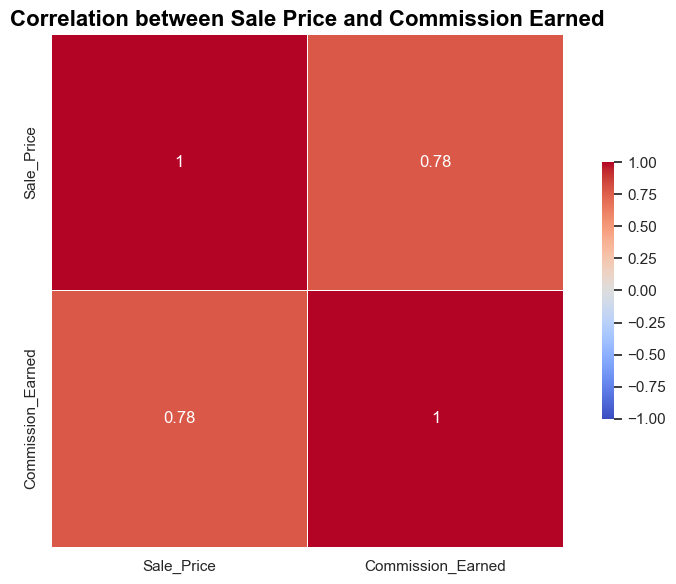

In [14]:
# 4. **Price and Commission Correlation**:
#    - What is the relationship between sale price and commission earned? Are higher-priced sales consistently associated with higher commissions?

sale_comm = df[["Sale_Price", "Commission_Earned"]]
print(sale_comm.corr())
print("\n\n")

# Visualization 
plt.figure(figsize=(8, 6))

sns.heatmap(sale_comm.corr(), annot= True, cmap="coolwarm", vmin= -1, vmax= 1, center= 0, square= True, linewidths= .5, cbar_kws={"shrink": .5})
plt.title("Correlation between Sale Price and Commission Earned", fontsize = 16, fontweight = "bold", color= "black")

plt.tight_layout()
plt.show()

In [15]:
# 5. **Customer Segmentation**:
#    - Can we identify distinct customer segments based on their purchasing behavior? How can these segments be used to tailor marketing strategies?

customer_features = df.groupby("Customer_Name").agg({"Sale_Price":["sum","mean"], "Commission_Earned":"sum", "Profit_Margin":"mean",
                                                    "Dates":"count"})

customer_features.columns = ["Total_Sales", "Avg_Sale_Price", "Total_Commission", 
                             "Avg_Profit_Margin","Frequency"]

# Defining segmentation based on criteria

def customer_seg(row):
    if row["Total_Sales"] > 150000:
        return "Higher_Spender"
    elif row["Frequency"] > 10:
        return "Frequent Buyer"
    elif row["Avg_Sale_Price"] > 5000:
        return "Premium Buyer"
    else:
        return "Occassional Buyer"

customer_features['Segment'] = customer_features.apply(customer_seg, axis=1)

In [16]:
# Analyzing characteristics of each segment
segment_analysis = customer_features.groupby('Segment').mean()
print(segment_analysis)

# Count the number of customers in each segment
segment_counts = customer_features['Segment'].value_counts()
print(segment_counts)


                  Total_Sales  Avg_Sale_Price  Total_Commission  \
Segment                                                           
Higher_Spender  482073.702740    30864.464062      48197.844480   
Premium Buyer    52338.367151    29769.004227       5235.141062   

                Avg_Profit_Margin  Frequency  
Segment                                       
Higher_Spender          90.002978  15.922613  
Premium Buyer           89.994090   1.782269  
Segment
Premium Buyer     406773
Higher_Spender    111478
Name: count, dtype: int64


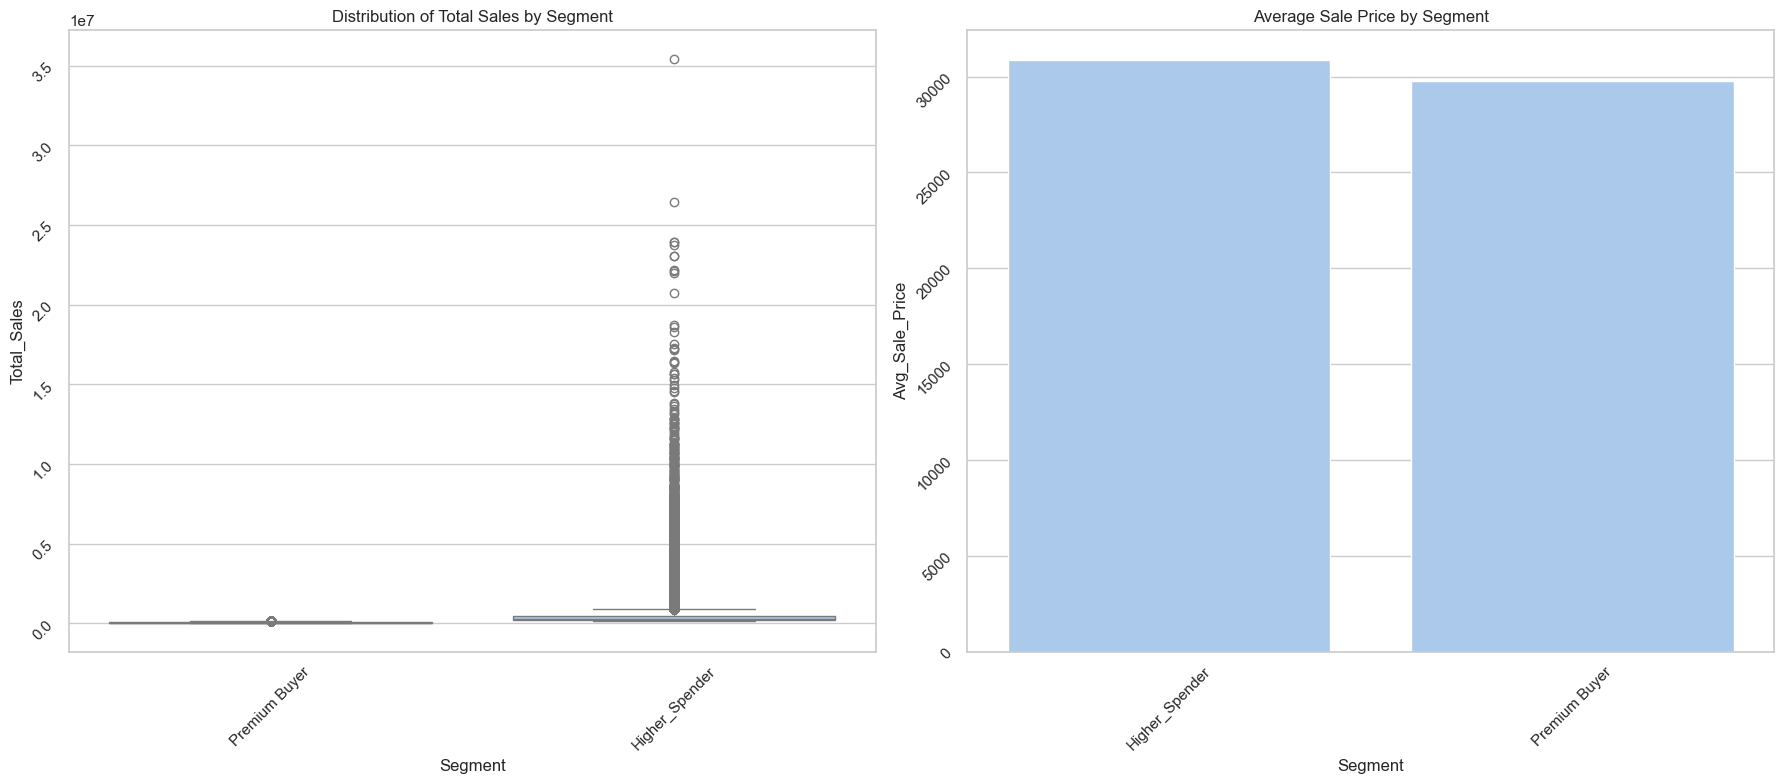

In [17]:
# Visualizing
fig, (fig1, fig2) = plt.subplots(1, 2, figsize= (18,8))


# Distribution of Total Sales by Segment
sns.boxplot(x='Segment', y='Total_Sales', data=customer_features, ax= fig1)
fig1.set_title('Distribution of Total Sales by Segment')
fig1.tick_params(rotation=45)

# Average Sale Price by Segment
sns.barplot(x='Segment', y='Avg_Sale_Price', data=segment_analysis.reset_index(), ax= fig2)
fig2.set_title('Average Sale Price by Segment')
fig2.tick_params(rotation=45)

plt.tight_layout()
plt.show()

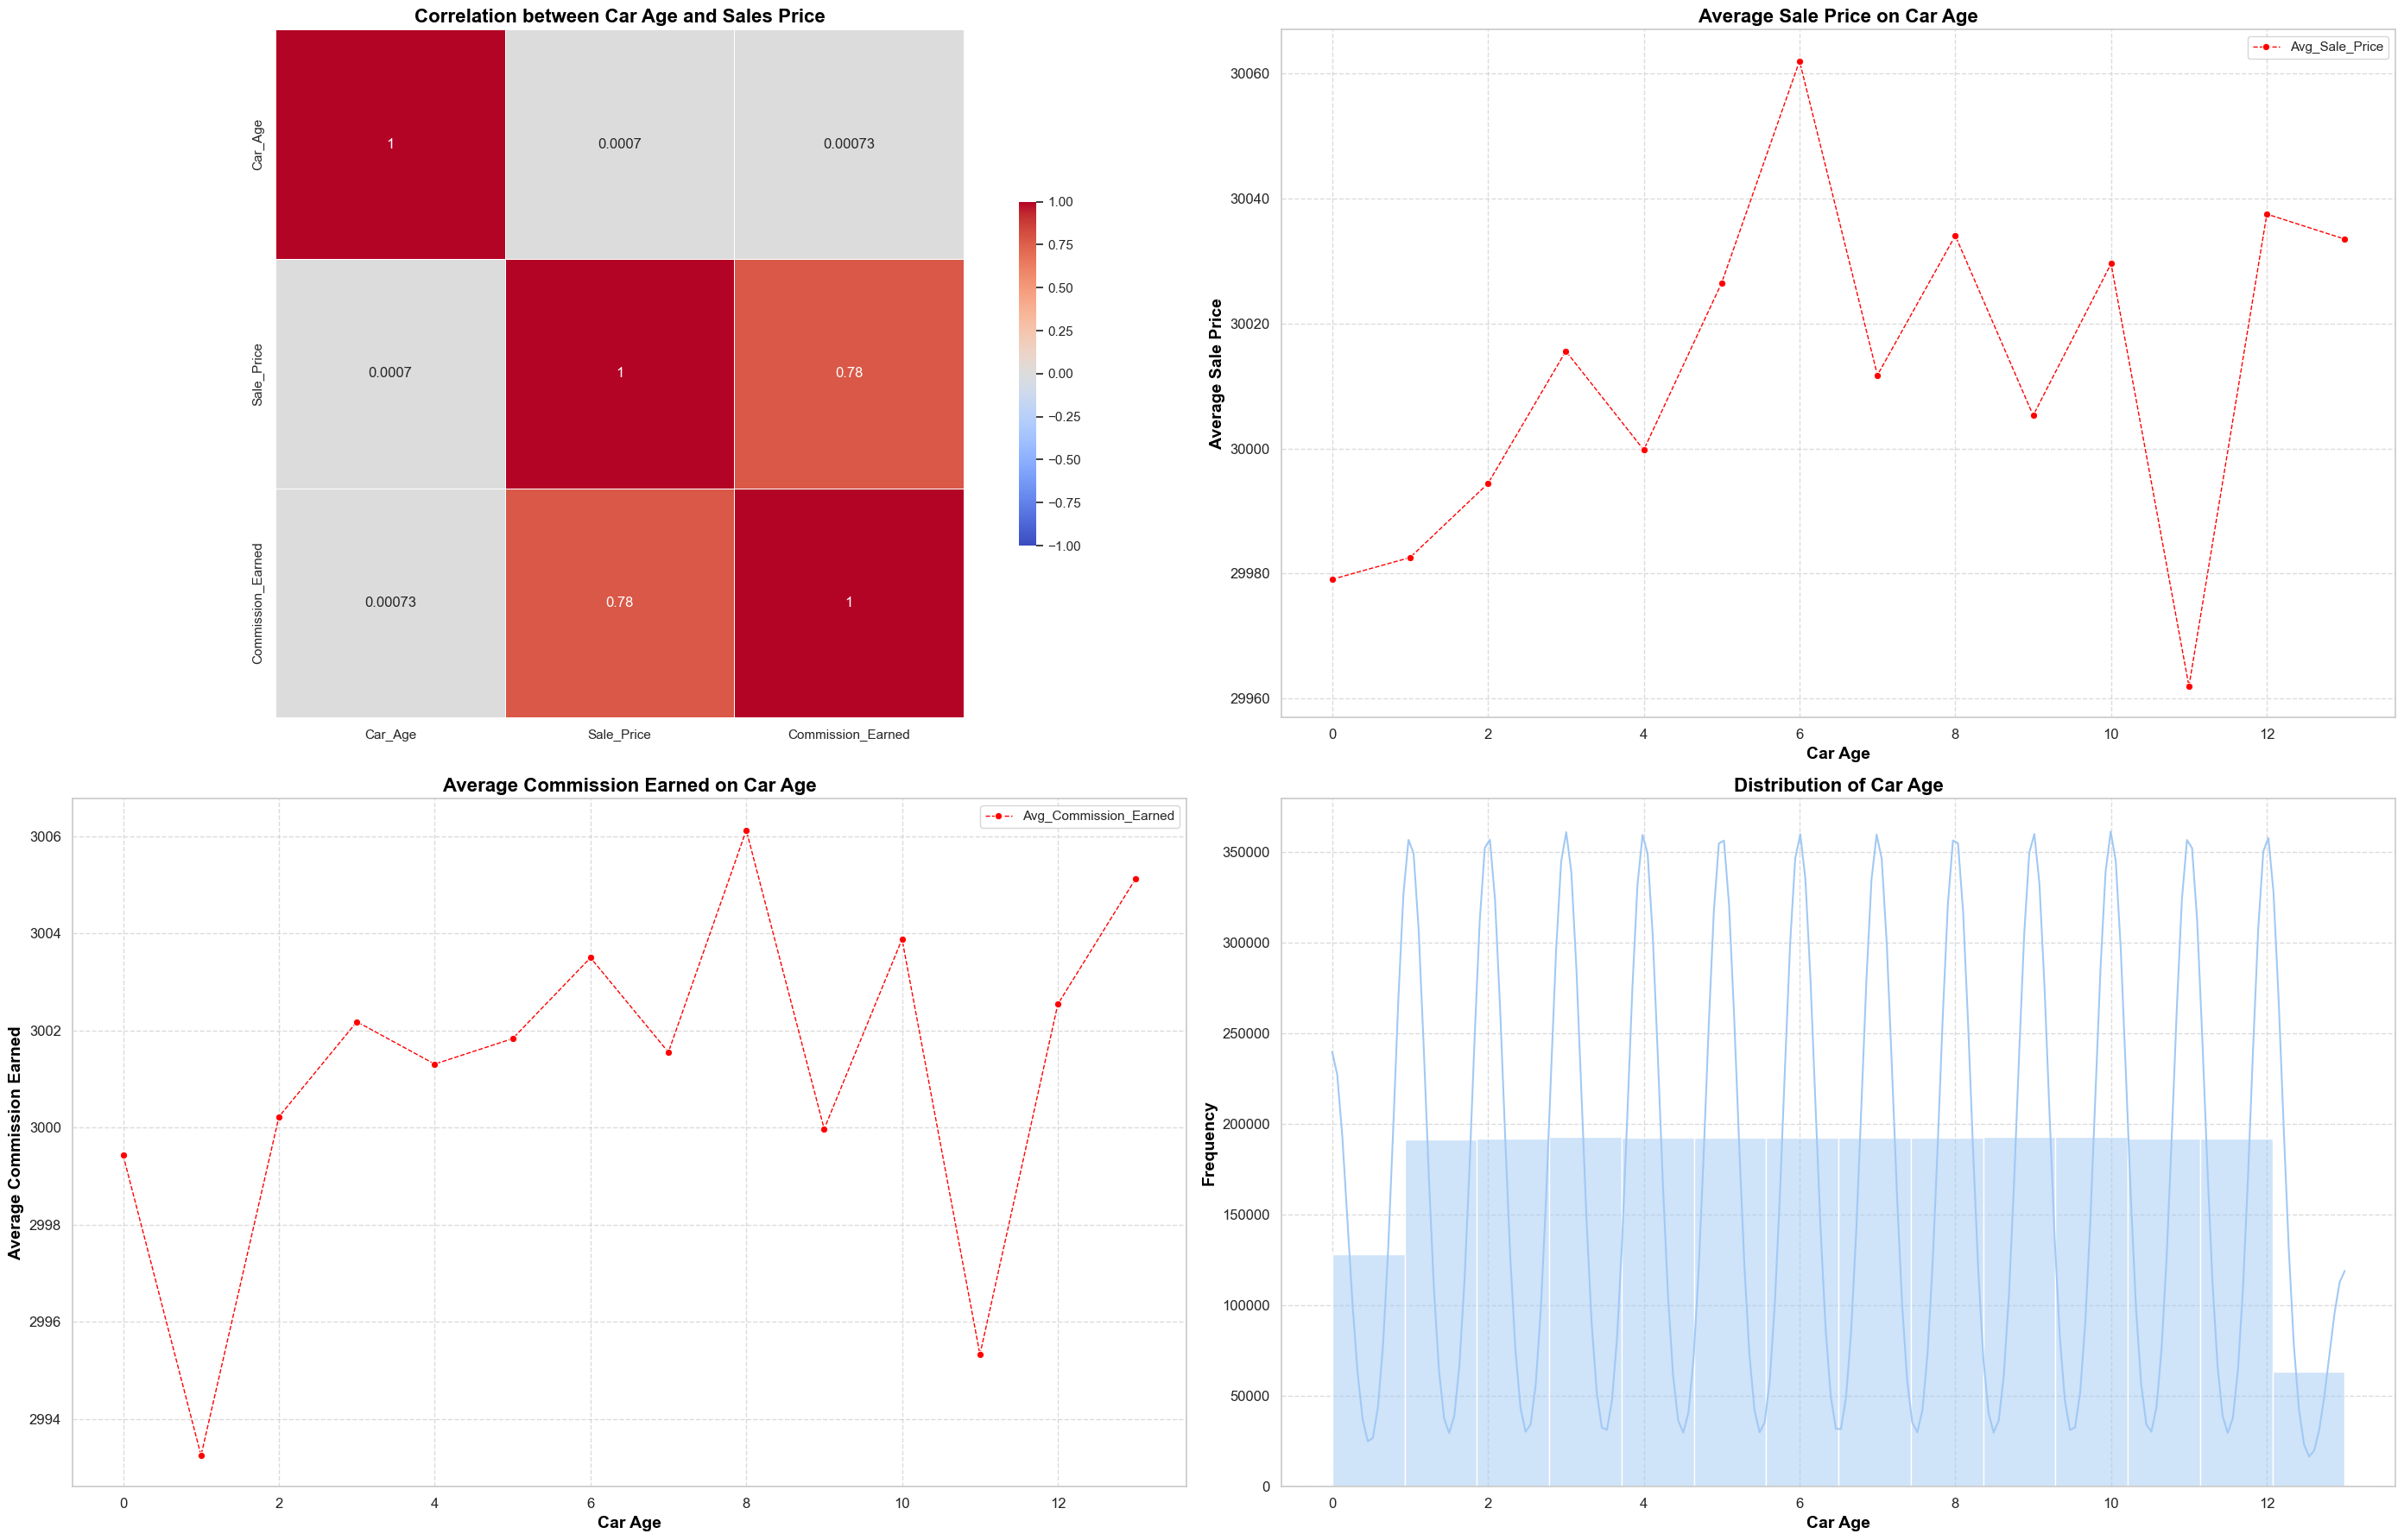

In [18]:
# 6. **Effect of Car Age on Sales**:
#    - How does the age of a car (based on car year) impact its sale price and the commission earned? Are older cars sold at a discount compared to newer models?

# Car age staitistics
car_age_summary = df.groupby("Car_Age").agg({"Sale_Price":["mean","count"], "Commission_Earned":"mean"})
car_age_summary.columns = ["Avg_Sale_Price", "Sale_Price_Count", "Avg_Commission_Earned"]

#Coefficients relations
car_sale_coeff = df[["Car_Age", "Sale_Price", "Commission_Earned"]]

# Visualizing
fig, ((fig1, fig2), (fig3, fig4)) = plt.subplots(2, 2, figsize=(28,18))

# Correlation between Car age, Sale price and commission earned
sns.heatmap(car_sale_coeff.corr(), annot= True, cmap= "coolwarm", vmin= -1, vmax= 1, center= 0, square= True, linewidths= .5, cbar_kws={"shrink": .5}, ax= fig1)
fig1.set_title("Correlation between Car Age and Sales Price", fontsize= 16, fontweight= "bold", color= "black")

# Line plot for Avg Sale Price based on car age
sns.lineplot(x= car_age_summary.index, y= car_age_summary["Avg_Sale_Price"], label= "Avg_Sale_Price", 
             marker= "o", ls="--", lw= 1, color= "red", ax= fig2)
fig2.set_xlabel("Car Age", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_ylabel("Average Sale Price", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_title("Average Sale Price on Car Age", fontsize= 16, fontweight= "bold", color= "black")
fig2.tick_params(axis='both', which='major', labelsize=12)
fig2.grid(True, linestyle='--', alpha=0.7)


# Line plot for Avg Commission Earned based on car age
sns.lineplot(x= car_age_summary.index, y= car_age_summary["Avg_Commission_Earned"], label= "Avg_Commission_Earned", 
             marker= "o", ls="--", lw= 1, color= "red", ax= fig3)
fig3.set_xlabel("Car Age", fontsize= 14, fontweight= "bold", color= "black")
fig3.set_ylabel("Average Commission Earned", fontsize= 14, fontweight= "bold", color= "black")
fig3.set_title("Average Commission Earned on Car Age", fontsize= 16, fontweight= "bold", color= "black")
fig3.tick_params(axis='both', which='major', labelsize=12)
fig3.grid(True, linestyle='--', alpha=0.7)


# Distribution of Car age
sns.histplot(x = df["Car_Age"], bins= 14, kde= True, ax= fig4)
fig4.set_xlabel("Car Age", fontsize= 14, fontweight= "bold", color= "black")
fig4.set_ylabel("Frequency", fontsize= 14, fontweight= "bold", color= "black")
fig4.set_title("Distribution of Car Age", fontsize= 16, fontweight= "bold", color= "black")
fig4.tick_params(axis='both', which='major', labelsize=12)
fig4.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [19]:
# 8. **Time Series Forecasting**:
#    - Can we forecast future sales and commission trends based on historical data? What are the predicted trends for the next quarter or year?

# Setting 'Dates' as the index
df.set_index('Dates', inplace=True)

# Resampling the data to a suitable frequency (e.g., monthly)
monthly_sales = df['Sale_Price'].resample('M').sum()
monthly_commission = df['Commission_Earned'].resample('M').sum()



C:\Users\ashis\AppData\Local\Temp\ipykernel_11840\3032405317.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sale_Price'].resample('M').sum()
C:\Users\ashis\AppData\Local\Temp\ipykernel_11840\3032405317.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_commission = df['Commission_Earned'].resample('M').sum()


C:\Users\ashis\AppData\Local\Temp\ipykernel_11840\2971949211.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


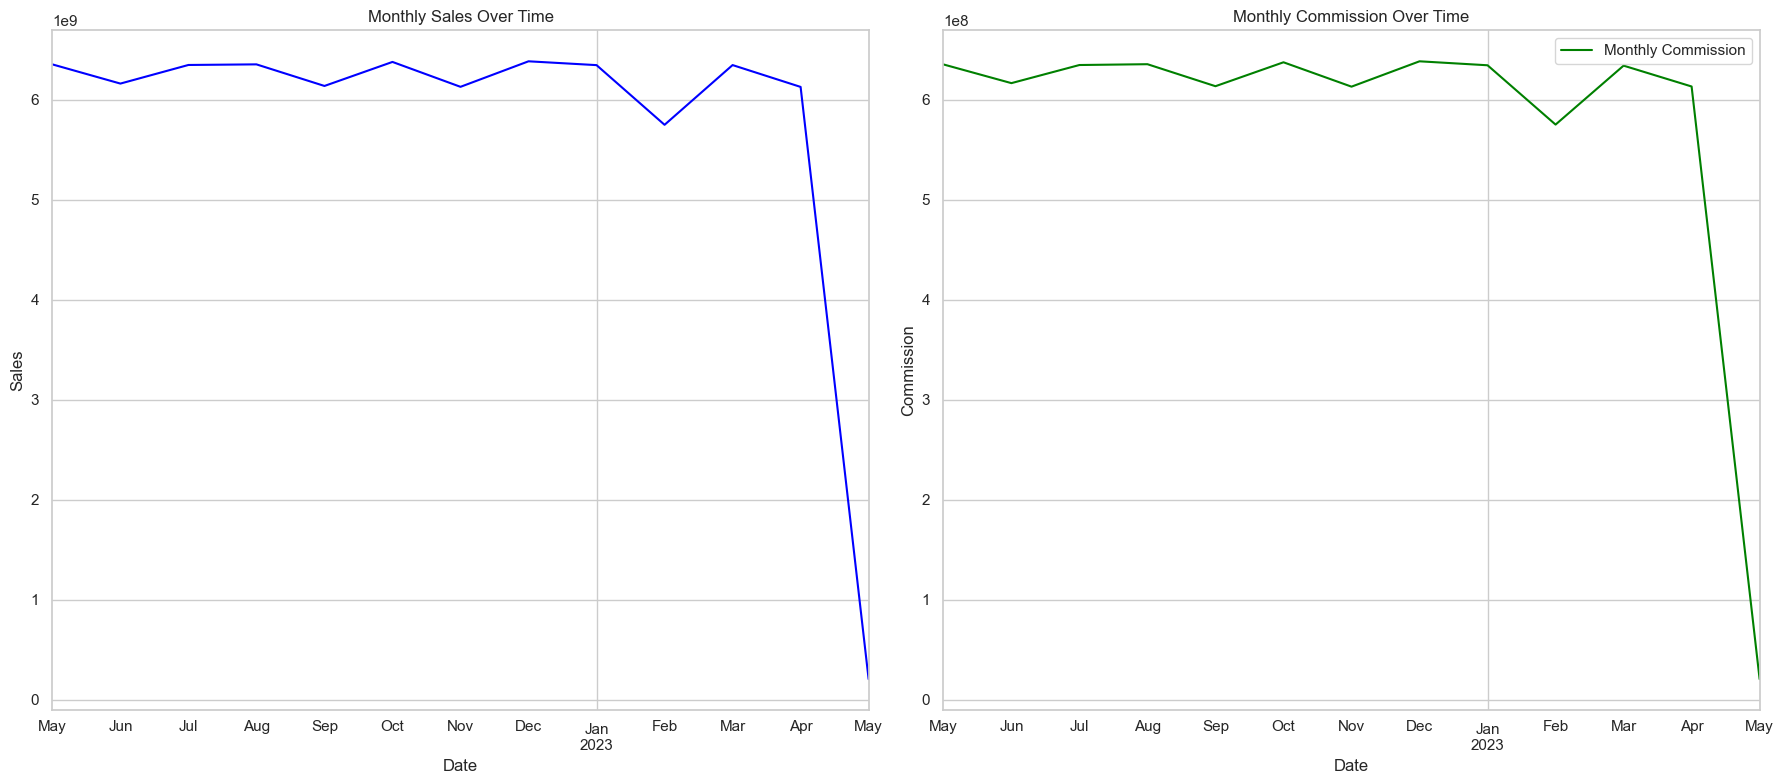

In [20]:
fig, (fig1, fig2) = plt.subplots(1,2, figsize= (18,8))

# Plot monthly sales
monthly_sales.plot(label='Monthly Sales', color='blue', ax= fig1)
fig1.set_title('Monthly Sales Over Time')
fig1.set_xlabel('Date')
fig1.set_ylabel('Sales')
plt.legend()
fig1.grid(True)


# Plot monthly commission
monthly_commission.plot(label='Monthly Commission', color='green', ax= fig2)
fig2.set_title('Monthly Commission Over Time')
fig2.set_xlabel('Date')
fig2.set_ylabel('Commission')
plt.legend()
fig2.grid(True)

plt.tight_layout()
plt.show()

-----------Summary statistics----------- 
         Sale_Price  Commission_Earned
count  2.500000e+06       2.500000e+06
mean   3.001218e+04       3.001005e+03
std    1.154514e+04       1.481467e+03
min    1.000000e+04       5.013400e+02
25%    2.001900e+04       1.821710e+03
50%    3.000600e+04       2.741910e+03
75%    4.002200e+04       3.978142e+03
max    5.000000e+04       7.494530e+03





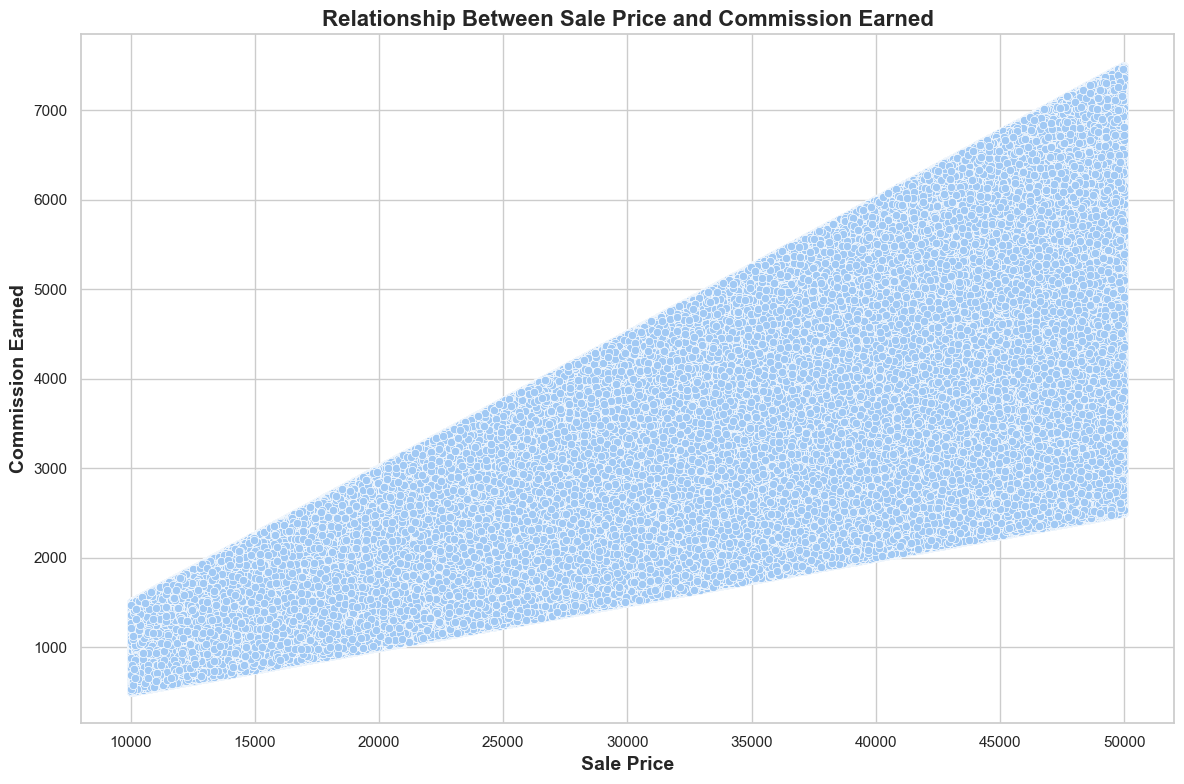

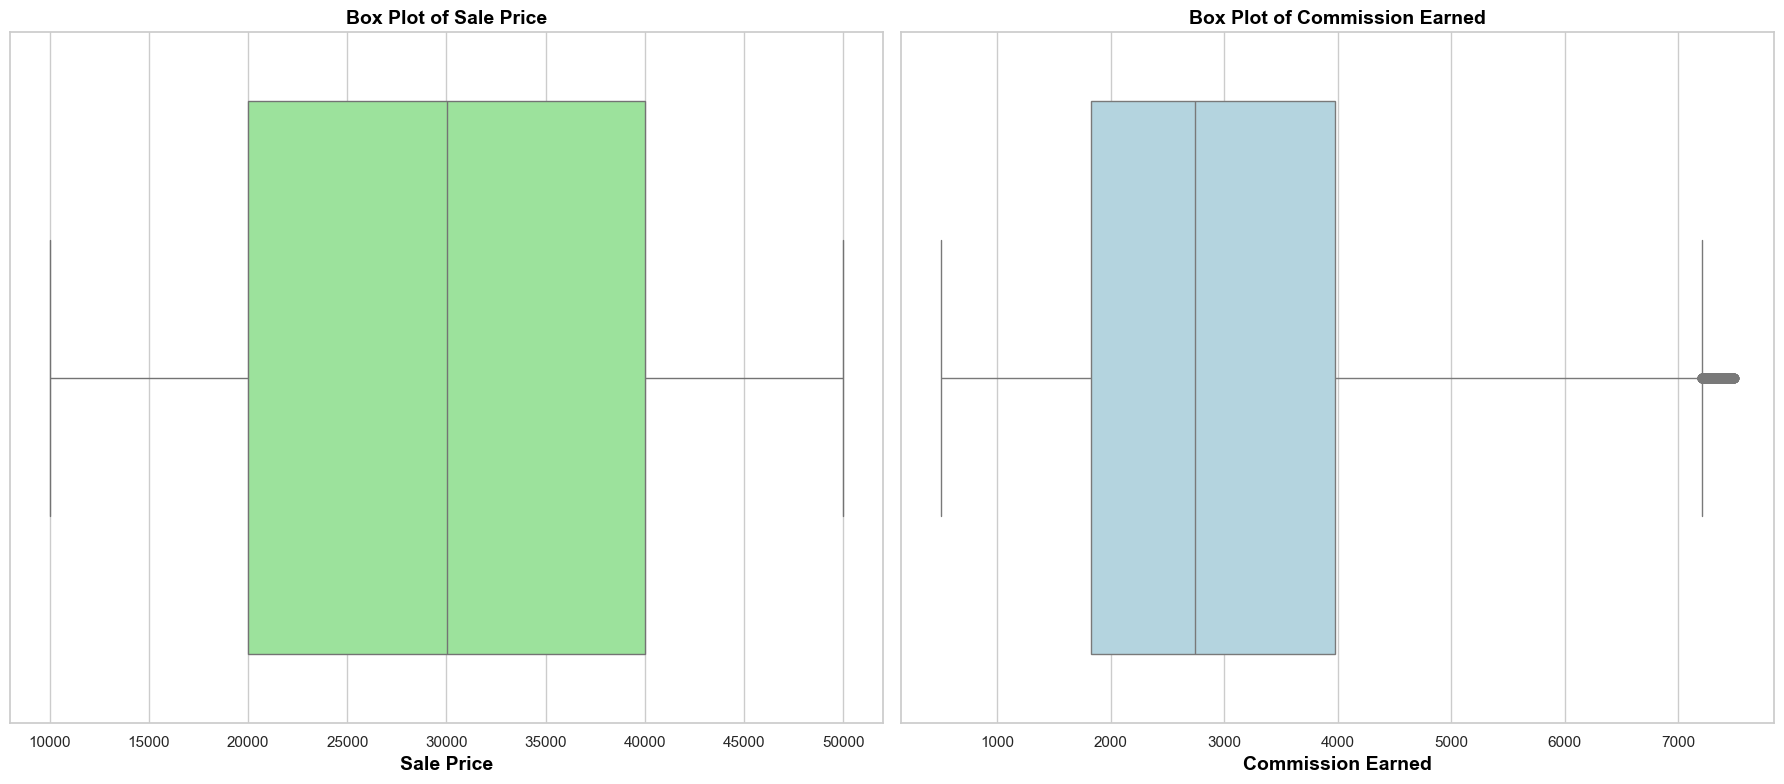

In [21]:
# 10. **Anomaly Detection**:
#     - Are there any anomalies or outliers in the sales or commission data? What might be causing these anomalies, and how should they be addressed?

# Summary statistics for Sale Price and Commission Earned
print("-----------Summary statistics----------- ")
print(df[['Sale_Price', 'Commission_Earned']].describe())

# Visualizing
print("\n\n")

# Scatter plot and Regplot to view the flow of sale price and commission earned
plt.figure(figsize= (12,8))
sns.scatterplot(x= df["Sale_Price"], y= df["Commission_Earned"])
plt.title("Relationship Between Sale Price and Commission Earned", fontsize=16, fontweight='bold')
plt.xlabel("Sale Price", fontsize=14, fontweight='bold')
plt.ylabel("Commission Earned", fontsize=14, fontweight='bold')
plt.grid(True)

plt.tight_layout()
plt.show()

# Creating subplots for Box Plots to identify anomalies
fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(18,8))

# Box Plot to detect Sale Price anomalies
sns.boxplot(x = df["Sale_Price"], color= "lightgreen", ax= fig1)
fig1.set_xlabel("Sale Price", fontsize= 14, fontweight= "bold", color= "black")
fig1.set_title("Box Plot of Sale Price", fontsize= 14, fontweight= "bold", color= "black")

# Box Plot to detect Commission Earned anomalies
sns.boxplot(x = df["Commission_Earned"], color = "lightblue", ax= fig2)
fig2.set_xlabel("Commission Earned", fontsize= 14, fontweight= "bold", color= "black")
fig2.set_title("Box Plot of Commission Earned", fontsize= 14, fontweight= "bold", color= "black")

plt.tight_layout()
plt.show()